<a href="https://colab.research.google.com/github/binit24/Datascience.com/blob/main/Copy_of_Seoul_Temp_Dataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
#import warnings:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
f = open("Bias_correction_ucl.csv")

In [ ]:
#Reading the Dataset:
df = pd.read_csv('Bias_correction_ucl.csv')
print(df.shape) #checking no of rows and columns in the dataset.
df.head()

(7752, 25)


,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [ ]:
#using Pd.options display max columns to check entire rows and columns in dataset.
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [ ]:
#Checking datatypes:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [ ]:
#Apart from Date column no categorigal data are present thats great!

In [ ]:
#Checking for categorical columns:
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)
print("Categorical Columns:",cat_col)

Categorical Columns: ['Date']


                  Total Missing Value
station                             2
Date                                2
Present_Tmax                       70
Present_Tmin                       70
LDAPS_RHmin                        75
LDAPS_RHmax                        75
LDAPS_Tmax_lapse                   75
LDAPS_Tmin_lapse                   75
LDAPS_WS                           75
LDAPS_LH                           75
LDAPS_CC1                          75
LDAPS_CC2                          75
LDAPS_CC3                          75
LDAPS_CC4                          75
LDAPS_PPT1                         75
LDAPS_PPT2                         75
LDAPS_PPT3                         75
LDAPS_PPT4                         75
lat                                 0
lon                                 0
DEM                                 0
Slope                               0
Solar radiation                     0
Next_Tmax                          27
Next_Tmin                          27


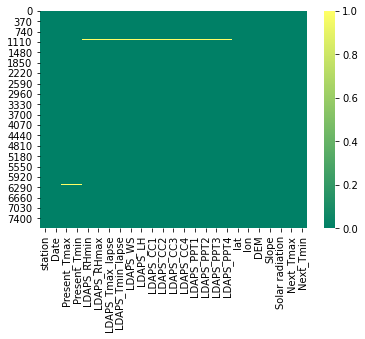

In [ ]:
#Checking the null values in the dataset:
missing_value = pd.DataFrame(df.isnull().sum(),columns=['Total Missing Value'])
print(missing_value)
sns.heatmap(df.isnull(),cmap='summer')

In [ ]:
#we will use simple imputer function from sklearn to remove null values:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="mean")
df['station'] = imp.fit_transform(df['station'].values.reshape(-1,1))
df['Present_Tmax'] = imp.fit_transform(df['Present_Tmax'].values.reshape(-1,1))
df['Present_Tmin'] = imp.fit_transform(df['Present_Tmin'].values.reshape(-1,1))
df['LDAPS_RHmin'] = imp.fit_transform(df['LDAPS_RHmin'].values.reshape(-1,1))
df['LDAPS_RHmax'] = imp.fit_transform(df['LDAPS_RHmax'].values.reshape(-1,1))
df['LDAPS_Tmax_lapse'] = imp.fit_transform(df['LDAPS_Tmax_lapse'].values.reshape(-1,1))
df['LDAPS_Tmin_lapse'] = imp.fit_transform(df['LDAPS_Tmin_lapse'].values.reshape(-1,1))
df['LDAPS_CC1'] = imp.fit_transform(df['LDAPS_CC1'].values.reshape(-1,1))
df['LDAPS_CC2'] = imp.fit_transform(df['LDAPS_CC2'].values.reshape(-1,1))
df['LDAPS_CC3'] = imp.fit_transform(df['LDAPS_CC3'].values.reshape(-1,1))
df['LDAPS_CC4'] = imp.fit_transform(df['LDAPS_CC4'].values.reshape(-1,1))
df['LDAPS_PPT1'] = imp.fit_transform(df['LDAPS_PPT1'].values.reshape(-1,1))
df['LDAPS_PPT2'] = imp.fit_transform(df['LDAPS_PPT2'].values.reshape(-1,1))
df['LDAPS_PPT3'] = imp.fit_transform(df['LDAPS_PPT3'].values.reshape(-1,1))
df['LDAPS_PPT4'] = imp.fit_transform(df['LDAPS_PPT4'].values.reshape(-1,1))
df['Next_Tmax'] = imp.fit_transform(df['Next_Tmax'].values.reshape(-1,1))
df['Next_Tmin'] = imp.fit_transform(df['Next_Tmin'].values.reshape(-1,1))
df['LDAPS_WS'] = imp.fit_transform(df['Next_Tmin'].values.reshape(-1,1))
df['LDAPS_LH'] = imp.fit_transform(df['Next_Tmin'].values.reshape(-1,1))

In [ ]:
#Replacing null values for Date Column:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="most_frequent")
df['Date'] = imp.fit_transform(df['Date'].values.reshape(-1,1))


Are There Missing Data? : False


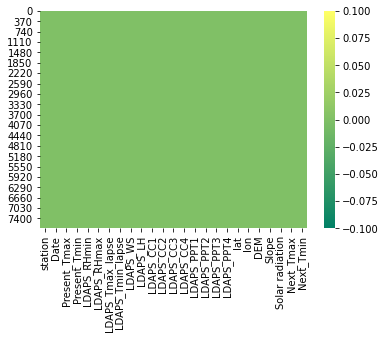

In [ ]:
#Now again checking for missing values:
print("Are There Missing Data? :",df.isnull().any().any())
sns.heatmap(df.isnull(),cmap='summer')

In [ ]:
#Checking unique value of some features:
print(df['station'].unique())
print('---------------------')
print(df['Solar radiation'].unique())
print('--------------------------')
print(df['Slope'].unique())
print('------------------------')
print(df['LDAPS_Tmax_lapse'].unique())

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25.]
---------------------
[5992.895996 5869.3125   5863.555664 ... 4403.272949 4398.263672
 4411.375977]
--------------------------
[2.785     0.5141    0.2661    2.5348    0.5055    0.1457    0.0985
 1.5629    0.4125    5.1782    0.6233    0.5931    2.6865    0.618
 0.8552    2.2579    0.697     1.2313    1.7678    4.7296    0.5721
 0.1332    0.1554    0.2223    0.2713    0.0984746 5.17823  ]
------------------------
[28.07410146 29.85068856 30.09129171 ... 26.35208148 27.01019337
 27.93951572]


In [ ]:
#Dropping some unimportant column:
df.drop(columns=['lat','lon'],axis=1,inplace=True)

In [ ]:
#checking the Columns:
columns = list(df.columns)
print(df.shape)
print(columns)

(7752, 23)
['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin']


In [ ]:
#Statistical Analysis
#Doing Statistical Analysis by using Describe Function
#Checking interquantile range.
#Checking mean median mode
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,22.932220,22.932220,0.368774,0.356080,0.318404,0.299191,0.591995,0.485003,0.278200,0.269407,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.210637,2.956557,2.403036,14.596973,7.157124,2.932898,2.333973,2.483276,2.483276,0.261185,0.256810,0.249148,0.253114,1.936331,1.754258,1.156174,1.200364,54.279780,1.370444,429.158867,3.122557,2.483276
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,11.300000,11.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,46.046162,84.316923,27.693091,22.114651,21.400000,21.400000,0.148321,0.142328,0.103100,0.082741,0.000000,0.000000,0.000000,0.000000,28.700000,0.271300,4999.018555,28.200000,21.400000
50%,13.000000,29.900000,23.400000,55.313244,89.699505,29.662273,23.735942,23.100000,23.100000,0.320110,0.315667,0.265264,0.232354,0.000000,0.000000,0.000000,0.000000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.038254,93.704500,31.683819,25.134000,24.600000,24.600000,0.571696,0.554963,0.494007,0.497230,0.067593,0.024276,0.009697,0.000693,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,29.800000,29.800000,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,212.335000,5.178230,5992.895996,38.900000,29.800000


In [ ]:
#Avg solar radiation 5341.50
#Avg Next Temperatuture maximum is 30.274887	
#Avg Next Temperatuture minimum is 22.932220
#There is possibility of presence of outliers as mean of some features are greater than median.
#In some of features theres an huge difference between 75% and max which confirm the presence of outliers.

In [ ]:
#Exploratory Data Analysis

#Univarite Analysis

#Multivariate Analysis

#Bivariate Analysis

#Here we check the relationship between different independant and dependant variable

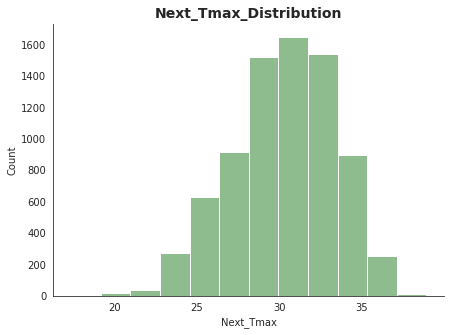

In [ ]:
#Univariate Analysis:
#Checking Distribution of Next_Tmax:
sns.set_style("white")
plt.figure(figsize = (7, 5))
plt.hist(df["Next_Tmax"],bins = 12, color = "darkseagreen")
plt.title("Next_Tmax_Distribution", fontsize = 14, weight = "bold")
plt.xlabel("Next_Tmax")
plt.ylabel("Count")
sns.despine()
plt.show()

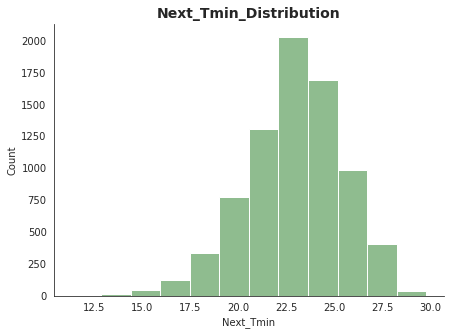

In [ ]:
#Univariate Analysis:
#Checking Distribution of Next_Tmin:
sns.set_style("white")
plt.figure(figsize = (7, 5))
plt.hist(df["Next_Tmin"],bins = 12, color = "darkseagreen")
plt.title("Next_Tmin_Distribution", fontsize = 14, weight = "bold")
plt.xlabel("Next_Tmin")
plt.ylabel("Count")
sns.despine()
plt.show()

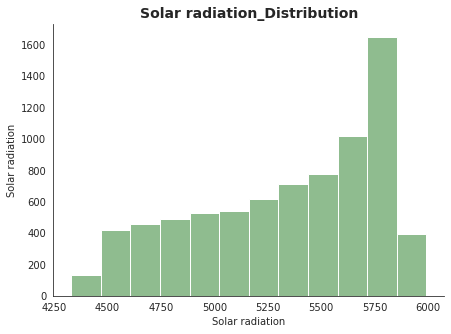

In [ ]:
#Univariate Analysis:
#Checking Distribution of Solar radiation:
sns.set_style("white")
plt.figure(figsize = (7, 5))
plt.hist(df["Solar radiation"],bins = 12, color = "darkseagreen")
plt.title("Solar radiation_Distribution", fontsize = 14, weight = "bold")
plt.xlabel("Solar radiation")
plt.ylabel("Solar radiation")
sns.despine()
plt.show()

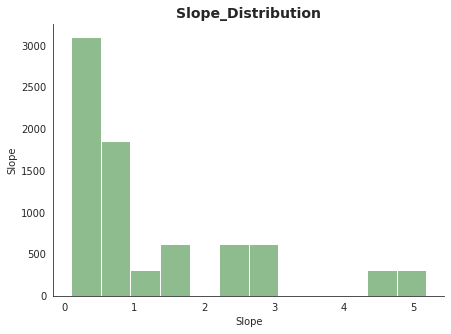

In [ ]:
#Univariate Analysis:
#Checking Distribution of Slope:
sns.set_style("white")
plt.figure(figsize = (7, 5))
plt.hist(df["Slope"],bins = 12, color = "darkseagreen")
plt.title("Slope_Distribution", fontsize = 14, weight = "bold")
plt.xlabel("Slope")
plt.ylabel("Slope")
sns.despine()
plt.show()

In [ ]:
#By seeing the distributions of above datapoints we can conclude that they are not normally distributed most of times skewness is present.

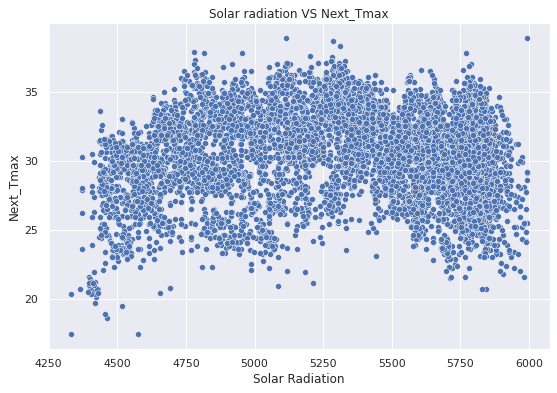

In [ ]:
# checking the relation between solar radiation and NextTmax:
sns.scatterplot(x='Solar radiation',y='Next_Tmax',data=df)
plt.xlabel('Solar Radiation')
plt.ylabel('Next_Tmax')
plt.title('Solar radiation VS Next_Tmax')
plt.show()
#we can see theres a positive relationship between Two features:

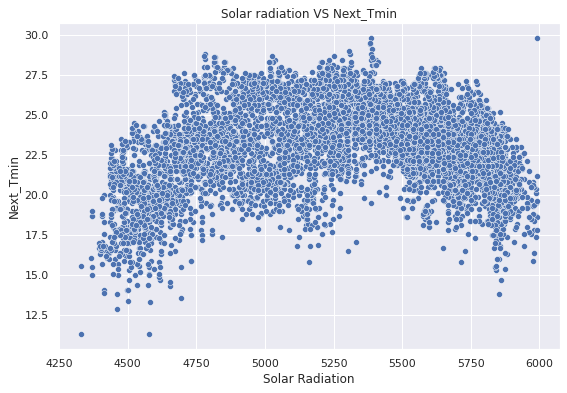

In [ ]:
# checking the relation between solar radiation and Next_Tmin:
sns.scatterplot(x='Solar radiation',y='Next_Tmin',data=df)
plt.xlabel('Solar Radiation')
plt.ylabel('Next_Tmin')
plt.title('Solar radiation VS Next_Tmin')
plt.show()

In [ ]:
df.shape

(7752, 23)

station                AxesSubplot(0.125,0.749828;0.133621x0.130172)
Present_Tmax        AxesSubplot(0.285345,0.749828;0.133621x0.130172)
Present_Tmin         AxesSubplot(0.44569,0.749828;0.133621x0.130172)
LDAPS_RHmin         AxesSubplot(0.606034,0.749828;0.133621x0.130172)
LDAPS_RHmax         AxesSubplot(0.766379,0.749828;0.133621x0.130172)
LDAPS_Tmax_lapse       AxesSubplot(0.125,0.593621;0.133621x0.130172)
LDAPS_Tmin_lapse    AxesSubplot(0.285345,0.593621;0.133621x0.130172)
LDAPS_WS             AxesSubplot(0.44569,0.593621;0.133621x0.130172)
LDAPS_LH            AxesSubplot(0.606034,0.593621;0.133621x0.130172)
LDAPS_CC1           AxesSubplot(0.766379,0.593621;0.133621x0.130172)
LDAPS_CC2              AxesSubplot(0.125,0.437414;0.133621x0.130172)
LDAPS_CC3           AxesSubplot(0.285345,0.437414;0.133621x0.130172)
LDAPS_CC4            AxesSubplot(0.44569,0.437414;0.133621x0.130172)
LDAPS_PPT1          AxesSubplot(0.606034,0.437414;0.133621x0.130172)
LDAPS_PPT2          AxesSubplot(0.

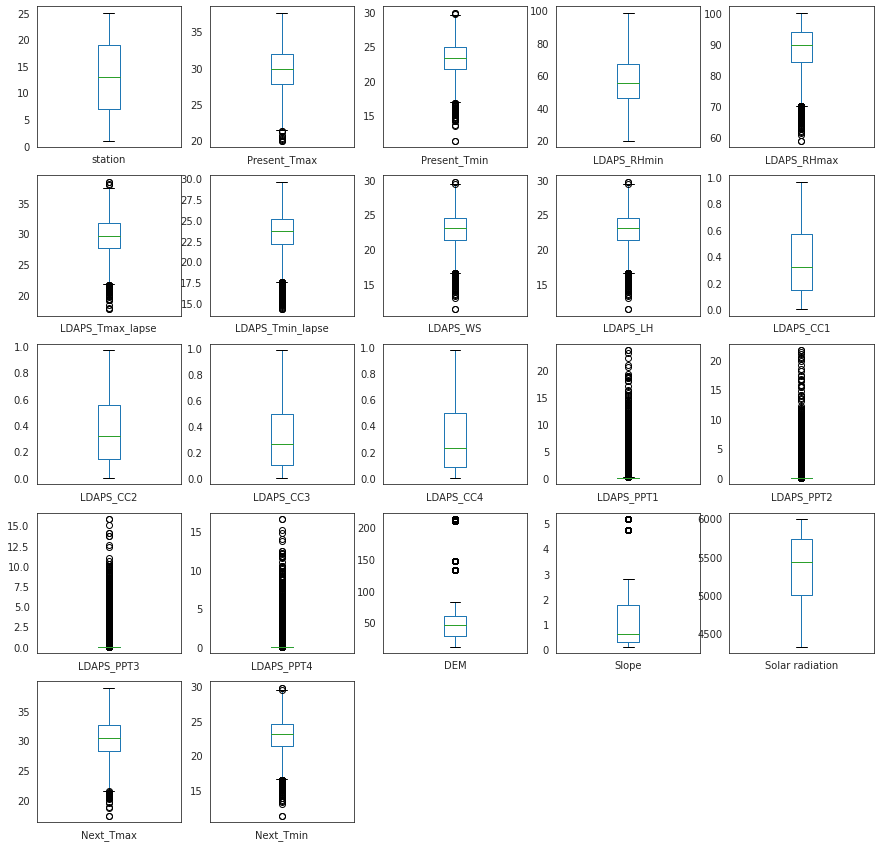

In [ ]:
#Checking for outliers
#outlier is a data point that differs significantly from other observations. 
#Any datapoint greater than +3 Standard Deviations and -3 SD are called Outliers
#Zscore is Automated method used to handle outliers.
# Checking for Outliers by using boxplot:.
df.plot(kind='box',subplots=True,layout=(5,5),figsize=(15,15))

In [ ]:
#We can clearly see the presence of Outliers:

In [ ]:
#From description we can see that Date is a object data type,Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction
df['Day'] = pd.to_datetime(df['Date'], format="%Y/%m/%d").dt.day

In [ ]:
#Extracting Month
df['month'] = pd.to_datetime(df['Date'], format="%Y/%m/%d").dt.month

In [ ]:
#Dropping Date Column:
df.drop('Date',axis=1,inplace=True)

In [ ]:
#Checking for skewness:
#whether the features are right or left skewed.
#for right and left skewed we can use logarthim transformation.
#if the skewness value is greater than o.55 then the features are skewed.
df.skew()

station             0.000000
Present_Tmax       -0.264137
Present_Tmin       -0.367538
LDAPS_RHmin         0.300220
LDAPS_RHmax        -0.855015
LDAPS_Tmax_lapse   -0.227880
LDAPS_Tmin_lapse   -0.581763
LDAPS_WS           -0.404447
LDAPS_LH           -0.404447
LDAPS_CC1           0.459458
LDAPS_CC2           0.472350
LDAPS_CC3           0.640735
LDAPS_CC4           0.666482
LDAPS_PPT1          5.393821
LDAPS_PPT2          5.775355
LDAPS_PPT3          6.457129
LDAPS_PPT4          6.825464
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.340200
Next_Tmin          -0.404447
dtype: float64

In [ ]:
import scipy.stats as stat
import pylab

In [ ]:
#If you want to check whether feature is guassian or normal distributed
# Q-Q plot is used to check wheather the data are normally distributed or not by graphically.
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

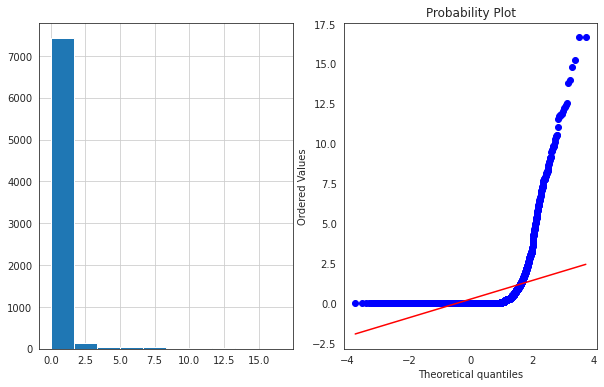

In [ ]:
#We can check for skewness by using Distrution plot:
plot_data(df,'LDAPS_PPT4')

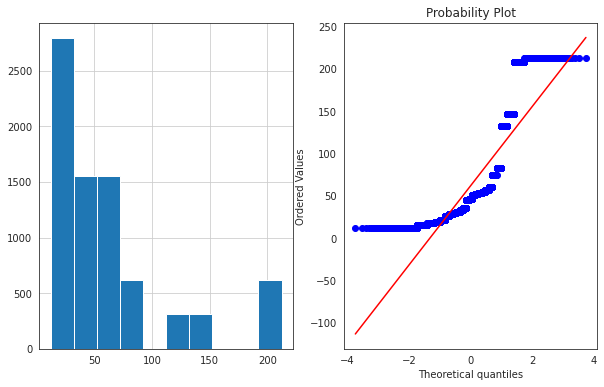

In [ ]:
#We can check for skewness by using Distrution plot:
plot_data(df,'DEM')

In [ ]:
#We can see that some of the features are not normally distributed skewness is present 
#for skewed Data Logarthim Tranformation works fine or we can also use Boxcox Method.
#If the skewness value is greater than 0.55 we consider that the feature is skewed.

In [ ]:
for col in df.columns:
    if col!= ['Next_Tmax','Next_Tmin']:
        if df.skew().loc[col]>0.55:
            df[col] = np.log1p(df[col])

In [ ]:
#Checking for outliers
#outlier is a data point that differs significantly from other observations. 
#Any datapoint greater than +3 Standard Deviations and -3 SD are called Outliers
#Zscore is Automated method used to handle outliers.
#Let check wheather any outliers are present or not
from scipy.stats import zscore
zscore = abs(zscore(df))
print("Before removal of outliers:",df.shape)
df_final = df.loc[(zscore<3).all(axis=1)]
print("After removal of outliers:",df_final.shape)

Before removal of outliers: (7752, 24)
After removal of outliers: (6771, 24)


In [ ]:
#Let Separate the input and output variable:
#Let select input and output value:
X = df_final.drop(['Next_Tmax','Next_Tmin'],axis=1)
y = df_final[['Next_Tmax','Next_Tmin']]

In [ ]:
#Lets check the shape of input and output values:
print(X.shape)
print(y.shape)

(6771, 22)
(6771, 2)


In [ ]:
#Breaking the model into training and testing split:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
print(X_train.shape,'\t',X_test.shape)

(5416, 22) 	 (1355, 22)


In [ ]:
print(y_train.shape,'\t',y_test.shape)

(5416, 2) 	 (1355, 2)


In [ ]:
#Checking the coerelation:
#how the different neumerical features are corelated to each other 
#Their strength of relationship
#Their influence on target variable.
corrmat = X_train.corr()

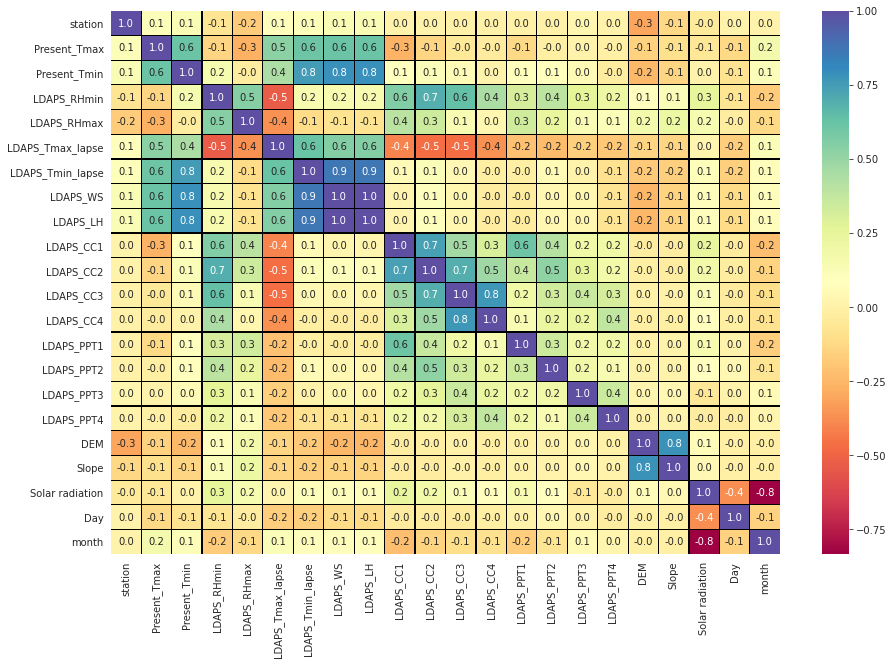

In [ ]:
f,ax=plt.subplots(figsize=(15,10))
sns.heatmap(corrmat,annot=True,fmt=".1f",linewidths=.2,cmap="Spectral",ax=ax,linecolor="black")
plt.show()

In [ ]:
#Here we can see that some of the features are highly corealted with each hence these both feature will act as same.
#so as these features are highly corelated with each other they can behave as duplicate feature.
#Lets define a function and set a minimum threshold value to tackle the highly corelated feature:
def get_corelations(data, threshold):
    corr_col = set()  
    corrmat = data.corr()
    for i in range(len(corrmat.columns)):
        for j in range(i):
            if abs(corrmat.iloc[i, j]) > threshold:
                colname = corrmat.columns[i]
                corr_col.add(colname)
    return corr_col

In [ ]:
corr_features = get_corelations(X_train, 0.85)
len(set(corr_features))

2

In [ ]:
#Dropping the highly corelated columns:
X_train_uncorr = X_train.drop(labels=corr_features,axis=1)
X_test_uncorr =  X_test.drop(labels=corr_features,axis=1)

In [ ]:
X_train_uncorr.shape, X_test_uncorr.shape

((5416, 20), (1355, 20))

In [ ]:
#Redefining traing and testing data:
X_train_uncorr, X_test_uncorr, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
#Using StandardScaler to Preprocess the data:
#StandardScaler is used to bring the datapoints to standard normal distribution where mean = 0 and SD(+-)1:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_uncorr)
X_train_uncorr = scaler.transform(X_train_uncorr)
X_test_uncorr = scaler.transform(X_test_uncorr)

In [ ]:
#Importing the Model for Predictions Process:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#Import Error Metrics:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

In [ ]:
#Defining a function of getting the perfect random state for max r2 score:
def maxr2_score(regr,X,y):
    max_r_score = 0
    for r_state in range(42,101):
        X_train_uncorr, X_test_uncorr, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
        regr.fit(X_train_uncorr,y_train)
        y_pred = regr.predict(X_test_uncorr)
        r2_scr = r2_score(y_test,y_pred)
        print('r2_score corresponding to random state: ',r_state,"is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score = r2_scr
            final_r_state = r_state
    print("max_r_score corresponding to:",final_r_state,"is",max_r_score)
    return final_r_state

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
r_state = maxr2_score(lr,X,y)

r2_score corresponding to random state:  42 is  0.8759362363968433
r2_score corresponding to random state:  43 is  0.8759362363968433
r2_score corresponding to random state:  44 is  0.8759362363968433
r2_score corresponding to random state:  45 is  0.8759362363968433
r2_score corresponding to random state:  46 is  0.8759362363968433
r2_score corresponding to random state:  47 is  0.8759362363968433
r2_score corresponding to random state:  48 is  0.8759362363968433
r2_score corresponding to random state:  49 is  0.8759362363968433
r2_score corresponding to random state:  50 is  0.8759362363968433
r2_score corresponding to random state:  51 is  0.8759362363968433
r2_score corresponding to random state:  52 is  0.8759362363968433
r2_score corresponding to random state:  53 is  0.8759362363968433
r2_score corresponding to random state:  54 is  0.8759362363968433
r2_score corresponding to random state:  55 is  0.8759362363968433
r2_score corresponding to random state:  56 is  0.875936236396

In [ ]:
#Lets do cross Validation.
from sklearn.model_selection import cross_val_score
print("mean r2_score for Linear Regression:",cross_val_score(lr,X,y,cv=5,scoring="r2").mean())
print("standard deviation in r2_score for linear Regression:",cross_val_score(lr,X,y,cv=5,scoring="r2").std())

mean r2_score for Linear Regression: 0.8435258499413998
standard deviation in r2_score for linear Regression: 0.020502964797479165


In [ ]:
#Lets Ckeck with Lasso Regression by performing hyperparametre Tuning:
from sklearn.linear_model import Lasso
lasso = Lasso()

In [ ]:
#Selecting the best alpha value:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
param = {'alpha':[0.001,0.01,0.1,1]}
grid = GridSearchCV(estimator=lasso,param_grid=param,cv=5,return_train_score=False)
grid.fit(X_train_uncorr,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

{'alpha': 0.001}
0.8628376856718745


In [ ]:
#Using Best alpha value:
lasso = Lasso(alpha=0.001)
r_state = maxr2_score(lasso,X,y)

r2_score corresponding to random state:  42 is  0.8758272252036313
r2_score corresponding to random state:  43 is  0.8758272252036313
r2_score corresponding to random state:  44 is  0.8758272252036313
r2_score corresponding to random state:  45 is  0.8758272252036313
r2_score corresponding to random state:  46 is  0.8758272252036313
r2_score corresponding to random state:  47 is  0.8758272252036313
r2_score corresponding to random state:  48 is  0.8758272252036313
r2_score corresponding to random state:  49 is  0.8758272252036313
r2_score corresponding to random state:  50 is  0.8758272252036313
r2_score corresponding to random state:  51 is  0.8758272252036313
r2_score corresponding to random state:  52 is  0.8758272252036313
r2_score corresponding to random state:  53 is  0.8758272252036313
r2_score corresponding to random state:  54 is  0.8758272252036313
r2_score corresponding to random state:  55 is  0.8758272252036313
r2_score corresponding to random state:  56 is  0.875827225203

In [ ]:
#Lets do cross Validation.
from sklearn.model_selection import cross_val_score
print("mean r2_score for Lasso Regression:",cross_val_score(lasso,X,y,cv=5,scoring="r2").mean())
print("standard deviation in r2_score for lasso Regression:",cross_val_score(lasso,X,y,cv=5,scoring="r2").std())

mean r2_score for Lasso Regression: 0.843663427816988
standard deviation in r2_score for lasso Regression: 0.019612295934058957


In [ ]:
#Lets Ckeck with Ridge Regression by performing hyperparametre Tuning:
from sklearn.linear_model import Ridge
ridge = Ridge()

In [ ]:
#Selecting the best alpha value:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
param = {'alpha':[0.001,0.01,0.1,1]}
grid = GridSearchCV(estimator=ridge,param_grid=param,cv=5,return_train_score=False)
grid.fit(X_train_uncorr,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

{'alpha': 0.1}
0.8628583193023281


In [ ]:
#Using Best alpha value:
ridge = Ridge(alpha=0.01)
r_state = maxr2_score(lasso,X,y)

r2_score corresponding to random state:  42 is  0.8758272252036313
r2_score corresponding to random state:  43 is  0.8758272252036313
r2_score corresponding to random state:  44 is  0.8758272252036313
r2_score corresponding to random state:  45 is  0.8758272252036313
r2_score corresponding to random state:  46 is  0.8758272252036313
r2_score corresponding to random state:  47 is  0.8758272252036313
r2_score corresponding to random state:  48 is  0.8758272252036313
r2_score corresponding to random state:  49 is  0.8758272252036313
r2_score corresponding to random state:  50 is  0.8758272252036313
r2_score corresponding to random state:  51 is  0.8758272252036313
r2_score corresponding to random state:  52 is  0.8758272252036313
r2_score corresponding to random state:  53 is  0.8758272252036313
r2_score corresponding to random state:  54 is  0.8758272252036313
r2_score corresponding to random state:  55 is  0.8758272252036313
r2_score corresponding to random state:  56 is  0.875827225203

In [ ]:
#Lets do cross Validation.
from sklearn.model_selection import cross_val_score
print("mean r2_score for Ridge Regression:",cross_val_score(ridge,X,y,cv=5,scoring="r2").mean())
print("standard deviation in r2_score for Ridge Regression:",cross_val_score(ridge,X,y,cv=5,scoring="r2").std())

mean r2_score for Ridge Regression: 0.8435281971390847
standard deviation in r2_score for Ridge Regression: 0.02049886339467903


In [ ]:
#Saving the best Model for future predictions:
import joblib
joblib.dump(lr,'lasso.obj')
lasso_from_joblib = joblib.load('lasso.obj')
lasso_from_joblib.predict(X_test)

array([[34.23804183, 23.7       ],
       [33.71834586, 23.3       ],
       [31.29484102, 23.5       ],
       ...,
       [34.83931815, 27.2       ],
       [34.85027097, 25.7       ],
       [28.14740754, 21.2       ]])